<div style="width:100%;border-collapse:separate;border:solid 2px;border-radius:14px;">
    <div style="display:flex;">
        <div style="display:inline;width:5%;"></div>
        <div style="display:inline;width:15%;">NSI1</div>
        <div style="display:inline;width:15%;">07c</div>
        <div style="display:inline;width:70%;text-align:right;"><b>Langages et programmation</b></div>
        <div style="display:inline;width:5%;"></div>
    </div>
    <div  style="display: flex;background-color:#EEE">
        <p style="width:100%;text-align:center;">Utilisation de bibliothèques. Fonctions et Spécifications</p>
    </div>
    <div  style="display: flex;">
        <p style="width:100%;text-align:center;">Comparaison d'algorithmes de recherche de primalité</p>
    </div>
</div>

<p><span style="font-size: 10pt;">Ce notebook n'a pas vocation a &ecirc;tre &eacute;tudi&eacute; int&eacute;gralement par les &eacute;l&egrave;ves de <strong>premi&egrave;re</strong>: Certaines parties sortent du programme de cette ann&eacute;e.</span></p>
<p><span style="font-size: 10pt;">Par contre, les approches des premiers algorithmes et la comparaison graphique des performances m&eacute;ritent une attention particuli&egrave;re.</span></p>

In [122]:
from matplotlib import pyplot as plt
import math
import sys
import timeit

In [123]:
def est_premier_v1(x):
    # 0 et 1 ne sont pas des nombres premiers
    """ x est un entier positif
        Renvoie True si x est un nombre premier
        Sinon, renvoie False
        Vérifie la divisibilité de x avec tous les entiers compris entre 2 et x-1
    """
    if x >1: # Evacue le test de primalité pour 0 et 1
        résultat = True
    else:
        résultat = False
    # Test systématiquement la divisisbilité de x par tous les entiers compris entre 2 et x-1
    for i in range(2, x):
        if x%i == 0:
            return False
    return résultat # résultat est un booléen. Il vaut True ou False.
    
def est_premier_v2(x):
    """ x est un entier positif supérieur à 1
        Renvoie True si x est un nombre premier
        Sinon, renvoie False
        Vérifie la divisibilité de x avec les entiers compris entre 2 et x-1
        S'arrête s'il en trouve un
    """
    # 0 et 1 ne sont pas des nombres premiers
    if x >1: # Evacue le test de primalité pour 0 et 1
        résultat = True
    else:
        résultat = False
    # Test la divisibilité avec les entiers compris entre 2 et x-1
    # Le test s'arrêt dès que l'on a trouvé un diviseur
    i = 2
    while résultat == True and i<x:
        if x%i == 0:
            résultat = False
        i += 1
    return résultat

def est_premier_v3(x):
    """ x est un entier positif supérieur à 1
        Renvoie True si x est un nombre premier
        Sinon, renvoie False
        Vérifie la divisibilité de x avec 2 puis les entiers impairs compris entre 3 et x-1
        S'arrête s'il en trouve un
    """
    # 0 et 1 ne sont pas des nombres premiers
    if x >1: # Evacue le test de primalité pour 0 et 1
        résultat = True
    else:
        résultat = False
    # 2 est un nombre premier
    if x%2 == 0 and x!= 2: # Evacue le test de primalité pour les multiples de 2 (sauf 2)
        résultat = False
    i = 3
    # Test la divisibilité de x par tous les entiers précedents non pairs
    while résultat == True and i<x:
        if x%i == 0:
            résultat = False
        i += 2
    return résultat

def est_premier_v4(x):
    """ x est un entier positif
        Renvoie True si x est un nombre premier
        Sinon, renvoie False
        Vérifie la divisibilité de x avec 2 puis les entiers impairs compris entre 3 et sqrt(x)
        S'arrête s'il en trouve un
    """
    résultat = True
    if x <= 1: # Evacue le test de primalité pour 0 et 1
        résultat = False # 0 et 1 ne sont pas des nombres premiers
    if x%2 == 0 and x!= 2: # 2 est un nombre premier
        résultat = False
    i = 3
    # Test la divisibilité de x par tous les entiers précedents non pairs
    # jusqu'à la racine carré de x
    while résultat == True and i<=math.sqrt(x):
        if x%i == 0:
            résultat = False
        i += 2
    return résultat

In [124]:
def premiers_Eratosthene(x:int)->list:
    """ Soit x un entier positif >=2
        Renvoie la liste des nombres premiers inférieurs ou égaux à x
    """
    if x <= 1:
        return []
    premiers = [2] # Liste des nombres premiers à renvoyer
    cibles = [i for i in range(2,x+1) if (i%2==1 or i==2)] # Liste des potentiels nombres premiers 
    for nombre in cibles:
        if nombre != None:
            test_prima = True # Hypothèse de départ: Cenombre est premier
            p = 0
            # Test la divisibilité par chacun des premiers précédent
            while p < len(premiers) and test_prima:
                if nombre%premiers[p] == 0: # Finalement ce nombre n'est pas premier                
                    test_prima = False
                p += 1
            if test_prima:# nombre est bien premier
                premiers.append(nombre)
                coef = 1
                while nombre*coef <= x:
                    if nombre*coef in cibles: # Remplace par None tous les multiples de nombre
                        indice = cibles.index(nombre*coef)
                        cibles[indice] = None
                    coef += 1
    return premiers

In [125]:
# Crible d’Ératosthène - version 2
# Source: https://www.mathweb.fr/euclide/2021/02/24/le-crible-deratosthene-en-python/

def eratosthene_v2(n):
    L = [ i for i in range(2,n+1) ]
    P = [ ]
    
    while len(L) != 0:
        P.append(L[0])
        i = L[0]
        for k in L:
            if k % i == 0:
                del(L[L.index(k)])
    
    return P

In [126]:
def prem_sebhoa(n):
    """ Soit n un entier positif >=2
        Renvoie la liste des nombres premiers inférieurs ou égaux à n
        Version du 24/10/2021 par Sébastien Hoarau
    """
    premiers = [2]
    p = 3
    while p <= n:
        i = 0
        d = premiers[i]
        while d <= math.sqrt(p) and p%d != 0:
            i += 1
            d = premiers[i]
        if d > math.sqrt(p):
            premiers.append(p)
        p += 1
    return premiers

In [127]:
def eratost_serge(n):
    """ Soit n un entier positif >=2
        Renvoie la liste des nombres premiers inférieurs ou égaux à n
        Version du 24/10/2021 par Serge
    """
    liste = (n+1) * [True]
    liste[0] = False
    liste[1] = False
    for j in range(4, n+1, 2):
        liste[j] = False
    for i in range(3, int(n**0.5)+1):
        if liste[i]:
            j = i ** 2
            while j <= n:
                liste[j] = False
                j = j + i * 2
    return [i for i in range(n+1) if liste[i]]

In [128]:
""" ZONE ROUGE: Hors du programme de première
"""

' ZONE ROUGE: Hors du programme de première\n'

![Bandeau_alerte](https://raw.githubusercontent.com/ebuonocore/banque_images/main/signalisation/bandeau_alerte_800px_01.png?raw=true)

In [129]:
sys.setrecursionlimit(100000)

def premiers_rec(x):
    """ Soit x un entier positif >=2
        Renvoie la liste des nombres premiers inférieurs ou égaux à x
        Fonction récursive
    """
    if x <= 1:
        return []
    if x == 2:
        return [2]
    test_prima = True # Hypothèse de départ: Ce nombre est premier
    premiers_avant = premiers_rec(x-1)
    i = 0
    while i< len(premiers_avant) and test_prima:
        if x % premiers_avant[i] == 0:
            # Ce n'est donc pas un nombre premier. N'est pas ajouté à la liste
            return premiers_avant
        i += 1
    # x est donc bien un nombre premier
    premiers_avant.append(x)
    return premiers_avant

In [130]:
liste_premiers_v1 = lambda x:[i for i in range(x+1) if est_premier_v1(i)]
liste_premiers_v2 = lambda x:[i for i in range(x+1) if est_premier_v2(i)]
liste_premiers_v3 = lambda x:[i for i in range(x+1) if est_premier_v3(i)]
liste_premiers_v4 = lambda x:[i for i in range(x+1) if est_premier_v4(i)]
liste_premiers = [liste_premiers_v4, prem_sebhoa, eratost_serge]

for v in range(len(liste_premiers)):
    print(liste_premiers[v](97))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [135]:
def comparer_versions(versions, maximum):
    temps = {}
    redondance = 10
    for v in range(len(versions)):
        t = timeit.timeit(lambda:versions[v](maximum),number=redondance)
        temps['v'+str(v)] = round(t*1000,3)
    return temps

temps = comparer_versions(liste_premiers, 10000)
for version, durée in temps.items():
    print(f"{version} \t: {durée}", end ="\n")

v0 	: 217.255
v1 	: 136.01
v2 	: 47.695


In [136]:
memo = [[] for i in range(len(liste_premiers))]
x = []
for i in range(20):
    maximum = int(300 + i**2.5)
    x.append(maximum)
    temps = comparer_versions(liste_premiers, maximum)
    v = 0
    for durée in temps.values():
        memo[v].append(durée)
        v += 1      
    

![Bandeau_alerte](https://raw.githubusercontent.com/ebuonocore/banque_images/main/signalisation/bandeau_alerte_800px_01.png?raw=true)

In [137]:
""" FIN DE LA ZONE ROUGE
    Pour comprendre le code suivant, il suffit de comprendre que la boucle 'for' permet de tracer les courbes
    pour chaque algorithme des temps de recherche en fonciton su plus grand nombre premier recherché.
"""

" FIN DE LA ZONE ROUGE\n    Pour comprendre le code suivant, il suffit de comprendre que la boucle 'for' permet de tracer les courbes\n    pour chaque algorithme des temps de recherche en fonciton su plus grand nombre premier recherché.\n"

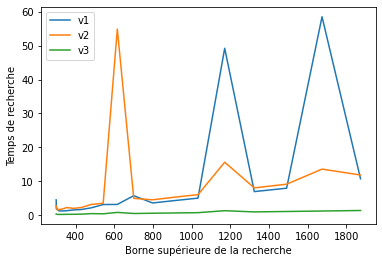

In [138]:
""" Tracés de du temps de recherche des entiers premiers en fonction 
    de la valeur de la borne supérieure de l'espace de recherche
    v1: Vérifie la divisibilité de x avec tous les entiers compris entre 2 et x-1
    v2: Vérifie la divisibilité de x avec les entiers compris entre 2 et x-1. S'arrête s'il en trouve un.
    v3: Vérifie la divisibilité de x avec 2 puis les entiers impairs compris entre 3 et x-1. S'arrête s'il en trouve un.
    v4: Vérifie la divisibilité de x avec 2 puis les entiers impairs compris entre 3 et sqrt(x)
        S'arrête s'il en trouve un.
    v5: Algorithme d'Eratosthène
    v6: Approche récursive    
"""


for v in range(len(liste_premiers)):
    plt.plot(x, memo[v], label="v"+str(v+1)) # Trace le graphe correspondant

plt.xlabel("Borne supérieure de la recherche")
plt.ylabel("Temps de recherche")
plt.legend()
plt.show() # Affiche la figure à l'ecran

---
<p style="font-family:Comic Sans MS; text-align: center; color:gray; font-size: x-small; ">- Eric Buonocore. septembre 2021 -<br></p>

![Licence CC BY NC SA](https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png)